## Dataset Analysis

In [1]:
folderPath = '/home/joshua/Documents/phd/CompressionVAEHSI/'

In [1]:
import sys
import os
cwd = os.getcwd()
parent_dir = os.path.abspath(os.path.join(os.path.dirname(cwd), '.')) # Get the absolute path to the parent directory
sys.path.insert(0, parent_dir) # Add the parent directory to sys.path

from src.data.datamodule import BigEarthNetDataModule

dataset_dir = "../data/" # root directory where to download the datasets
dataset_name = "bigearthnet-medium" # One of bigearthnet-mini, bigearthnet-medium, bigearthnet-full
batch_size = 16

dm = BigEarthNetDataModule(dataset_dir, dataset_name, batch_size=batch_size)
dm.setup()

../data/bigearthnet-medium/train loaded successfully.

../data/bigearthnet-medium/val loaded successfully.

../data/bigearthnet-medium/test loaded successfully.



In [3]:
print("Number of train samples: ", len(dm.train_dataloader().dataset))
print("Number of validation samples: ", len(dm.val_dataloader().dataset))
print("Number of test samples: ", len(dm.test_dataloader().dataset))

Number of train samples:  25000
Number of validation samples:  10000
Number of test samples:  10000


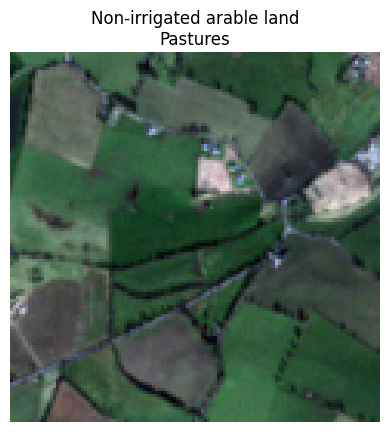

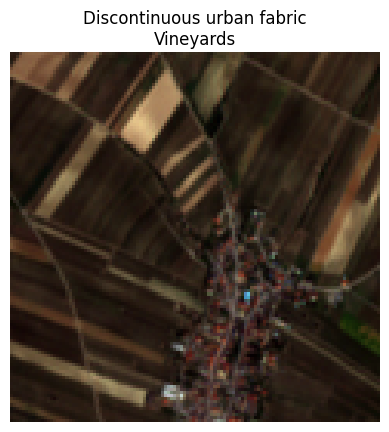

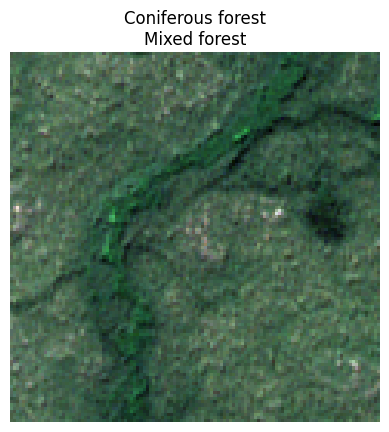

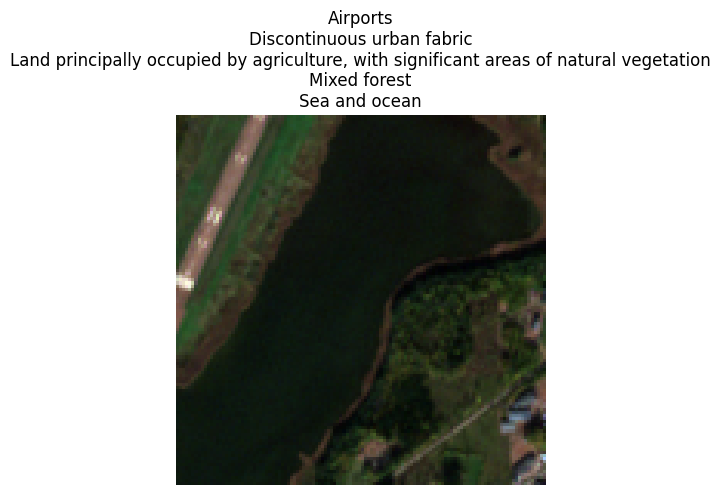

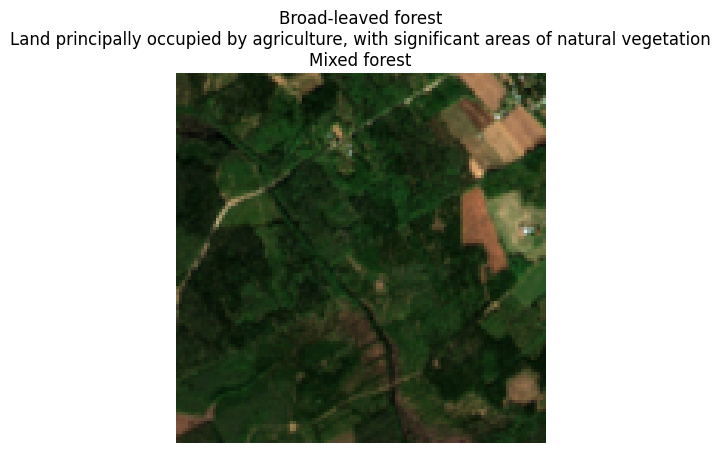

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def get_label_names(onehots, class_names):
    """get all the names when a label is a one-hot."""
    label_idx = np.where(onehots)[0]
    label_names = [class_names[idx] for idx in label_idx]
    return label_names

def display_image(ds, idx):
    img = ds[idx]['data'].numpy()
    labels = ds[idx]['labels']
    for band in range(len(img)):
        # normalize based on min/max pixel values to clamp ranges in [0, 1]
        img[band, ...] = (img[band, ...] - np.min(img[band, ...])) / np.max(img[band, ...])
    
    img = np.moveaxis(img, 0, 2) # C, W, H > W, H, C
    img = img[:,:,::-1] # BGR to RGB
    
    label_names = get_label_names(labels, ds.class_names) 

    plt.title('\n'.join(label_names))
    plt.imshow(img)
    ax = plt.gca()
    ax.set_axis_off()
    plt.show()

ds = dm.val_dataloader().dataset
for idx in [0, 12, 311, 776, 44]:
    display_image(ds, idx)

In [2]:
from torchgeo.datasets.bigearthnet import BigEarthNet
from torchgeo.datamodules.bigearthnet import BigEarthNetDataModule
import sys
import os
cwd = os.getcwd()
root = os.path.abspath(os.path.join(os.path.dirname(cwd), '.')) + '/data'

In [19]:
BENdataset = BigEarthNet(root=root, bands='s2')

In [6]:
dm = BigEarthNetDataModule(batch_size=16, root=root)
dm.setup('fit')

In [7]:
print("Number of train samples: ", len(dm.train_dataloader().dataset))
#print("Number of validation samples: ", len(dm.val_dataloader().dataset))
#print("Number of test samples: ", len(dm.test_dataloader().dataset))

Number of train samples:  269695


In [11]:
dm.train_dataset.folders

[{'s1': '/home/joshua/Documents/phd/CompressionVAEHSI/data/BigEarthNet-S1-v1.0/S1B_IW_GRDH_1SDV_20170717T064605_29UPA_28_87',
  's2': '/home/joshua/Documents/phd/CompressionVAEHSI/data/BigEarthNet-v1.0/S2A_MSIL2A_20170717T113321_28_87'},
 {'s1': '/home/joshua/Documents/phd/CompressionVAEHSI/data/BigEarthNet-S1-v1.0/S1B_IW_GRDH_1SDV_20170717T064605_29UPA_28_90',
  's2': '/home/joshua/Documents/phd/CompressionVAEHSI/data/BigEarthNet-v1.0/S2A_MSIL2A_20170717T113321_28_90'},
 {'s1': '/home/joshua/Documents/phd/CompressionVAEHSI/data/BigEarthNet-S1-v1.0/S1B_IW_GRDH_1SDV_20170717T064605_29UPA_29_83',
  's2': '/home/joshua/Documents/phd/CompressionVAEHSI/data/BigEarthNet-v1.0/S2A_MSIL2A_20170717T113321_29_83'},
 {'s1': '/home/joshua/Documents/phd/CompressionVAEHSI/data/BigEarthNet-S1-v1.0/S1B_IW_GRDH_1SDV_20170717T064605_29UPA_29_84',
  's2': '/home/joshua/Documents/phd/CompressionVAEHSI/data/BigEarthNet-v1.0/S2A_MSIL2A_20170717T113321_29_84'},
 {'s1': '/home/joshua/Documents/phd/CompressionV

In [12]:
dm.train_dataset._load_paths(index=1)

['/home/joshua/Documents/phd/CompressionVAEHSI/data/BigEarthNet-S1-v1.0/S1B_IW_GRDH_1SDV_20170717T064605_29UPA_28_90/S1B_IW_GRDH_1SDV_20170717T064605_29UPA_28_90_VH.tif',
 '/home/joshua/Documents/phd/CompressionVAEHSI/data/BigEarthNet-S1-v1.0/S1B_IW_GRDH_1SDV_20170717T064605_29UPA_28_90/S1B_IW_GRDH_1SDV_20170717T064605_29UPA_28_90_VV.tif',
 '/home/joshua/Documents/phd/CompressionVAEHSI/data/BigEarthNet-v1.0/S2A_MSIL2A_20170717T113321_28_90/S2A_MSIL2A_20170717T113321_28_90_B01.tif',
 '/home/joshua/Documents/phd/CompressionVAEHSI/data/BigEarthNet-v1.0/S2A_MSIL2A_20170717T113321_28_90/S2A_MSIL2A_20170717T113321_28_90_B02.tif',
 '/home/joshua/Documents/phd/CompressionVAEHSI/data/BigEarthNet-v1.0/S2A_MSIL2A_20170717T113321_28_90/S2A_MSIL2A_20170717T113321_28_90_B03.tif',
 '/home/joshua/Documents/phd/CompressionVAEHSI/data/BigEarthNet-v1.0/S2A_MSIL2A_20170717T113321_28_90/S2A_MSIL2A_20170717T113321_28_90_B04.tif',
 '/home/joshua/Documents/phd/CompressionVAEHSI/data/BigEarthNet-v1.0/S2A_MSIL2

In [17]:
dm.train_dataloader().dataset

In [8]:
import torch
from torch.utils.data import Dataset, Subset, DataLoader

In [69]:
subset_indices = range(10000)  # Adjust as needed
subset1 = Subset(BENdataset, subset_indices)

In [42]:
subset_indices1 = range(11, 21)  # Adjust as needed
subset2 = Subset(BENdataset, subset_indices1)

In [52]:
torch.all(subset1[0]['image'] == subset2[0]['image'])

tensor(False)

In [70]:
subset_loader = DataLoader(subset1, batch_size=2, shuffle=False)
subset_loader1 = DataLoader(subset2, batch_size=2, shuffle=False)

In [71]:
for batch in subset_loader:
    data1, label1 = batch.values()
    break 

In [64]:
ex1 = data[0,:,:,:]

In [66]:
for batch in subset_loader1:
    data2, label2 = batch.values()
    break 

In [67]:
ex2 = data[0,:,:,:]

In [68]:
torch.all(ex1 == ex2)

tensor(False)

In [2]:
import sys
import os
cwd = os.getcwd()
parent_dir = os.path.abspath(os.path.join(os.path.dirname(cwd), '.')) + '/src/data'# Get the absolute path to the parent directory
sys.path.insert(0, parent_dir) # Add the parent directory to sys.path
from bigearth_dataset import BigEarthDataset as BEGDataset

In [3]:
parent_dir

'/home/joshua/Documents/phd/CompressionVAEHSI/src/data'

In [4]:
root = os.path.abspath(os.path.join(os.path.dirname(cwd), '.')) + '/data'
root

'/home/joshua/Documents/phd/CompressionVAEHSI/data'

In [6]:
BENdataset = BEGDataset(root=root, bands='s2')

In [7]:
len(BENdataset)

519285

In [9]:
subset_indices = range(10000)  # Adjust as needed
subset1 = Subset(BENdataset, subset_indices)

In [10]:
len(subset1)

10000